# Machine Learning in Python - Project 1

Due Sunday, March 8th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here and load data*

In [6]:
# Add any additional libraries or submodules below
from sklearn.impute import KNNImputer
# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [13]:
# Load data in easyshare.csv
d = pd.read_csv("easyshare.csv")
d.head()

mergeid  int_year  wave  country  country_mod  female        age  \
0  AT-000674-01    2011.0   4.0     11.0         40.0     1.0  59.700001   
1  AT-001215-01    2011.0   4.0     11.0         40.0     1.0  72.599998   
2  AT-001492-01    2011.0   4.0     11.0         40.0     1.0  59.599998   
3  AT-001492-02    2011.0   4.0     11.0         40.0     0.0  59.799999   
4  AT-001816-01    2004.0   1.0     11.0         40.0     1.0  61.299999   

   birth_country  citizenship  isced1997_r  ...  bmi2  smoking  ever_smoked  \
0           40.0         40.0          5.0  ...   2.0      5.0          5.0   
1          528.0        528.0          5.0  ...   3.0      1.0          1.0   
2           40.0         40.0          3.0  ...   2.0      5.0          1.0   
3           40.0         40.0          4.0  ...   2.0      1.0          1.0   
4           40.0         40.0          3.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     NaN     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 23 columns]

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. European Union, Governments, Health Institutes and/or Charities on dementia and ageing). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mergeid        97372 non-null  object 
 1   int_year       97372 non-null  float64
 2   wave           97372 non-null  float64
 3   country        97372 non-null  float64
 4   country_mod    97372 non-null  float64
 5   female         97372 non-null  float64
 6   age            97372 non-null  float64
 7   birth_country  97170 non-null  float64
 8   citizenship    97281 non-null  float64
 9   isced1997_r    97372 non-null  float64
 10  eduyears_mod   84532 non-null  float64
 11  eurod          95838 non-null  float64
 12  bmi            94686 non-null  float64
 13  bmi2           94686 non-null  float64
 14  smoking        96887 non-null  float64
 15  ever_smoked    97116 non-null  float64
 16  br010_mod      79210 non-null  float64
 17  br015_         97113 non-null  float64
 18  casp  

The first variable, mergeid, is a unique identifier for each participant, which is in the type of object. Since it is not useful for our analysis and can be dropped.

In [15]:
# Drop the mergeid column
new_d = d.iloc[:, 1:]

In [16]:
# Check the info of the new DataFrame
new_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   int_year       97372 non-null  float64
 1   wave           97372 non-null  float64
 2   country        97372 non-null  float64
 3   country_mod    97372 non-null  float64
 4   female         97372 non-null  float64
 5   age            97372 non-null  float64
 6   birth_country  97170 non-null  float64
 7   citizenship    97281 non-null  float64
 8   isced1997_r    97372 non-null  float64
 9   eduyears_mod   84532 non-null  float64
 10  eurod          95838 non-null  float64
 11  bmi            94686 non-null  float64
 12  bmi2           94686 non-null  float64
 13  smoking        96887 non-null  float64
 14  ever_smoked    97116 non-null  float64
 15  br010_mod      79210 non-null  float64
 16  br015_         97113 non-null  float64
 17  casp           84065 non-null  float64
 18  chroni

In [26]:
# Generate descriptive statistics for numerical variables
descriptive_stats = new_d.describe()

In [27]:
# Output the descriptive statistics
descriptive_stats

int_year          wave       country   country_mod        female  \
count  97372.000000  97372.000000  97372.000000  97372.000000  97372.000000   
mean    2010.467537      3.794612     24.272080    384.954135      0.541480   
std        4.632490      2.146070     12.298221    229.261059      0.498279   
min     2004.000000      1.000000     11.000000     40.000000      0.000000   
25%     2006.000000      2.000000     15.000000    208.000000      0.000000   
50%     2011.000000      4.000000     20.000000    300.000000      1.000000   
75%     2013.000000      5.000000     31.000000    616.000000      1.000000   
max     2020.000000      8.000000     63.000000    756.000000      1.000000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  97372.000000   97170.000000  97281.000000  97372.000000  84532.000000   
mean      67.938640     398.304456    391.759830      2.658916     10.427832   
std        8.864202     237.542164    232.965078      1.493547      4.264231   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.500000     208.000000    208.000000      1.000000      8.000000   
50%       66.599998     348.000000    348.000000      3.000000     11.000000   
75%       74.199997     642.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  94686.000000  96887.000000  97116.000000  79210.000000   
mean   ...      2.849788      4.341790      3.255282      3.345916   
std    ...      0.762833      1.483112      1.983651      2.244878   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      5.000000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  97113.000000  84065.000000  97283.000000  83175.000000  96928.000000   
mean       2.672248     36.744008      1.305922      3.978635      2.173335   
std        1.325228      6.463052      1.269872      1.744222      1.403437   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     32.000000      0.000000      1.000000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     42.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  97372.000000  
mean      11.973714  
std        4.184386  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

In [18]:
# Check for missing values
missing_values = new_d.isnull().sum()

# Output the results
missing_values

int_year           976
wave               976
country            976
country_mod        976
female             976
age                976
birth_country     1178
citizenship       1067
isced1997_r        976
eduyears_mod     13816
eurod             2510
bmi               3662
bmi2              3662
smoking           1461
ever_smoked       1232
br010_mod        19138
br015_            1235
casp             14283
chronic_mod       1065
sp008_           15173
ch001_            1420
cogscore           976
dtype: int64

Here we can see that there are missing values in the dataset. We will use KNN imputation to fill in the missing values with the mean value from the 5 nearest neighbors found in the training set.

- **Contextual Background:** Briefly describe the prevalence and impact of dementia in Europe, highlighting its significance as a public health issue.

- **Data Overview:** Introduce the easySHARE dataset, including its scope, the demographic it covers, and why it's a valuable resource for understanding dementia.

- **Research Objective:** State the purpose of your analysis, emphasizing the goal of identifying factors associated with higher dementia risks and the development of a predictive model for cognitive scores.

- **Methodological Framework:** Outline the analytical methods and techniques you plan to use, such as statistical analysis, machine learning models, or data visualization.

- **Additional Data Sources:** If applicable, mention any supplementary data sources you're utilizing, explaining their relevance and how they complement the easySHARE dataset.

- **Potential Insights:** Provide a preview of the type of insights you aim to extract, such as risk factors, patterns, or correlations related to dementia.

- **Interventions and Recommendations:** Touch on the type of interventions or policy recommendations you hope your analysis will support.

- **Report Structure:** Briefly describe the structure of the report, outlining the main sections and the flow of information.

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

### First, fill in the missing values using KNN imputation

In [19]:
# Here we can see that there are missing values in the dataset. We will use KNN imputation to fill in the missing values.
# Comment out the following code if you want to use the imputed data

# # Initialize the KNN Imputer
# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# 
# # Fit the imputer to your data and transform it
# # This will fill missing values based on the mean value from n_neighbors nearest neighbors found in the training set
# d_imputed = imputer.fit_transform(new_d)
# 
# # d_imputed is a NumPy array. Convert it back to a DataFrame if you need
# d_imputed_df = pd.DataFrame(d_imputed, columns=new_d.columns)

In [20]:
# # Check for missing values of the imputed DataFrame
# missing_values_imputed = d_imputed_df.isnull().sum()
# 
# # Output the results
# missing_values_imputed

int_year         0
wave             0
country          0
country_mod      0
female           0
age              0
birth_country    0
citizenship      0
isced1997_r      0
eduyears_mod     0
eurod            0
bmi              0
bmi2             0
smoking          0
ever_smoked      0
br010_mod        0
br015_           0
casp             0
chronic_mod      0
sp008_           0
ch001_           0
cogscore         0
dtype: int64

In [ ]:
# # Save the imputed DataFrame to a CSV file
# d_imputed_df.to_csv("easyshare_imputed.csv", index=False)

# 从这里开始Run！

In [2]:
# Load the imputed DataFrame from the CSV file next time
df = pd.read_csv("easyshare_imputed.csv")

### Exploratory Data Analysis

In [31]:
# Check the data types of the imputed DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   int_year       98348 non-null  float64
 1   wave           98348 non-null  float64
 2   country        98348 non-null  float64
 3   country_mod    98348 non-null  float64
 4   female         98348 non-null  float64
 5   age            98348 non-null  float64
 6   birth_country  98348 non-null  float64
 7   citizenship    98348 non-null  float64
 8   isced1997_r    98348 non-null  float64
 9   eduyears_mod   98348 non-null  float64
 10  eurod          98348 non-null  float64
 11  bmi            98348 non-null  float64
 12  bmi2           98348 non-null  float64
 13  smoking        98348 non-null  float64
 14  ever_smoked    98348 non-null  float64
 15  br010_mod      98348 non-null  float64
 16  br015_         98348 non-null  float64
 17  casp           98348 non-null  float64
 18  chroni

In [38]:
# Display the first few rows of the imputed DataFrame
df.head()

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  bmi2  smoking  ever_smoked  \
0         40.0          5.0           3.0  ...   2.0      5.0          5.0   
1        528.0          5.0          15.0  ...   3.0      1.0          1.0   
2         40.0          3.0          11.0  ...   2.0      5.0          1.0   
3         40.0          4.0          13.0  ...   2.0      1.0          1.0   
4         40.0          3.0          12.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     3.4     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 22 columns]

In [32]:
# Generate descriptive statistics for numerical variables in the imputed DataFrame
descriptive_stats_new = df.describe()

In [33]:
# Output the descriptive statistics
descriptive_stats_new

int_year          wave       country   country_mod       female  \
count  98348.000000  98348.000000  98348.000000  98348.000000  98348.00000   
mean    2010.467537      3.794612     24.272080    384.954135      0.54148   
std        4.609446      2.135395     12.237044    228.120624      0.49580   
min     2004.000000      1.000000     11.000000     40.000000      0.00000   
25%     2006.000000      2.000000     15.000000    208.000000      0.00000   
50%     2011.000000      4.000000     20.000000    348.000000      1.00000   
75%     2013.000000      5.000000     31.000000    616.000000      1.00000   
max     2020.000000      8.000000     63.000000    756.000000      1.00000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  98348.000000   98348.000000  98348.000000  98348.000000  98348.000000   
mean      67.938640     398.473742    391.844096      2.658916     10.357658   
std        8.820107     236.258350    231.801339      1.486118      4.098175   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.599998     208.000000    208.000000      1.000000      8.000000   
50%       66.699997     348.000000    348.000000      3.000000     10.800000   
75%       74.000000     620.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  98348.000000  98348.000000  98348.000000  98348.000000   
mean   ...      2.850427      4.341156      3.256001      3.314380   
std    ...      0.751233      1.473567      1.971830      2.080354   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      4.600000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  98348.000000  98348.000000  98348.000000  98348.000000  98348.000000   
mean       2.673516     36.650172      1.306011      3.976654      2.173244   
std        1.317733      6.174605      1.263177      1.641224      1.394208   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     32.800000      0.000000      3.400000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     41.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  98348.000000  
mean      11.973714  
std        4.163572  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

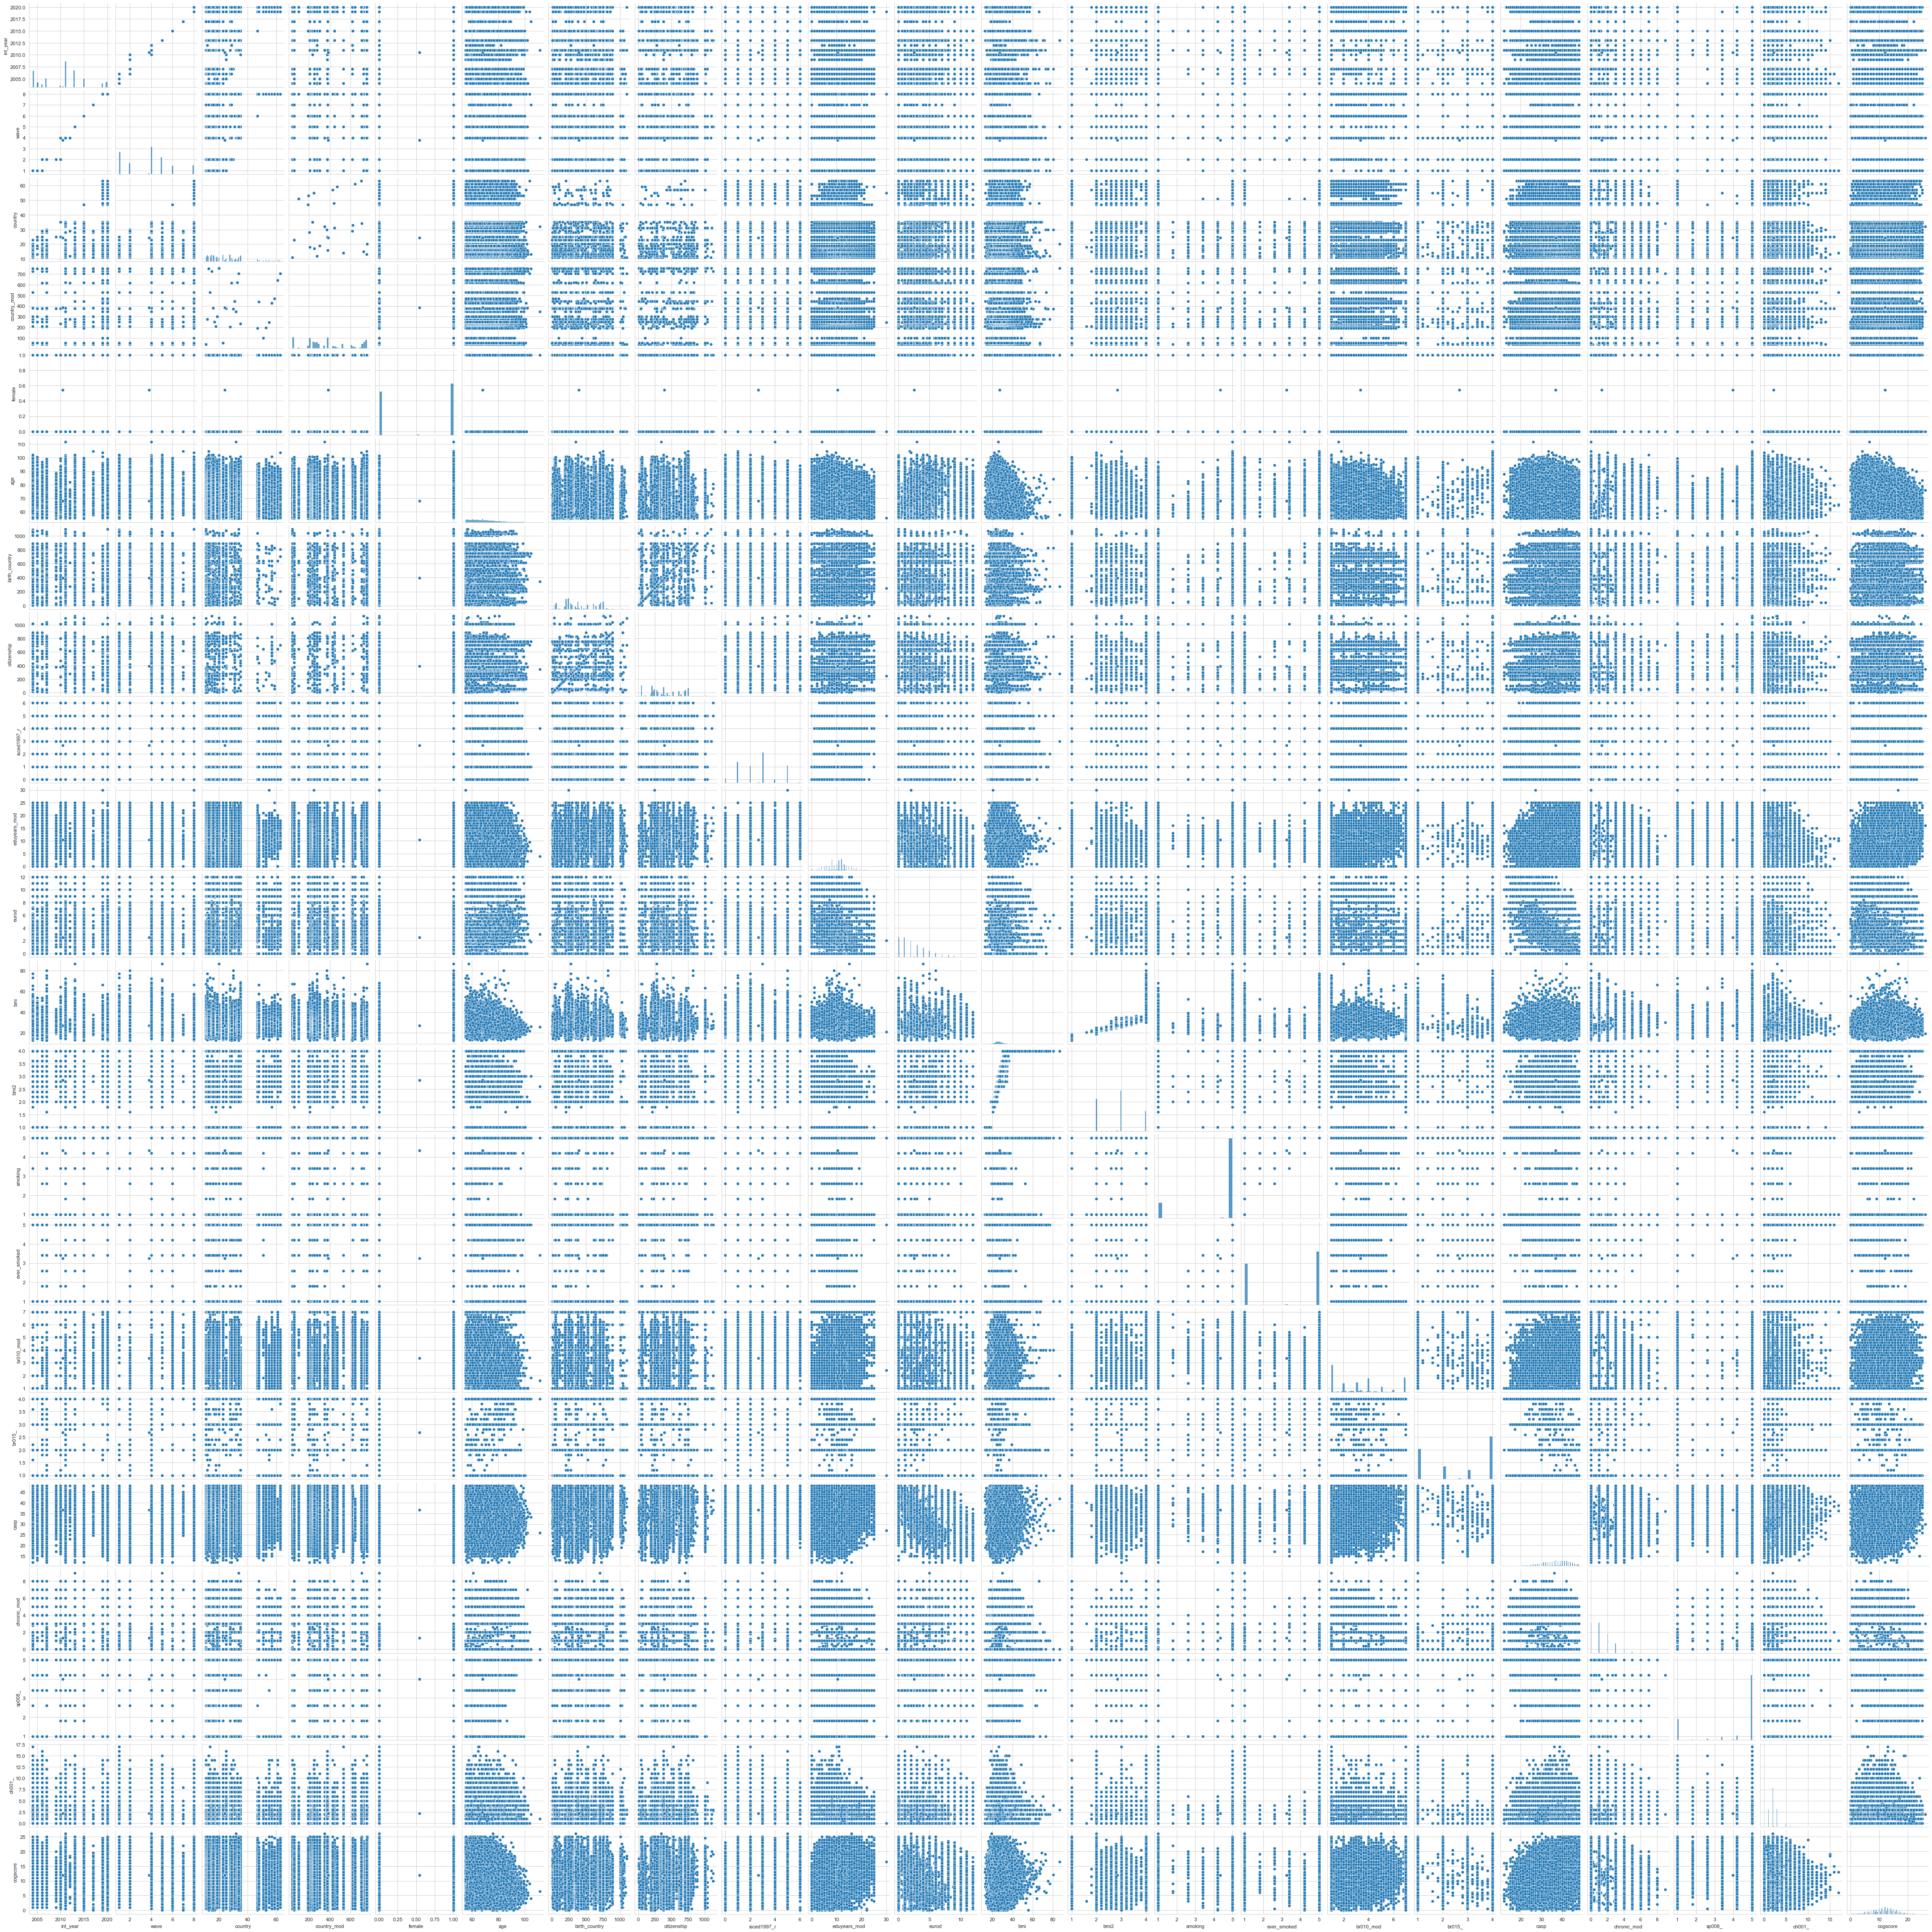

In [34]:
# Draw a pairplot of the numerical variables in the imputed DataFrame
sns.pairplot(df)

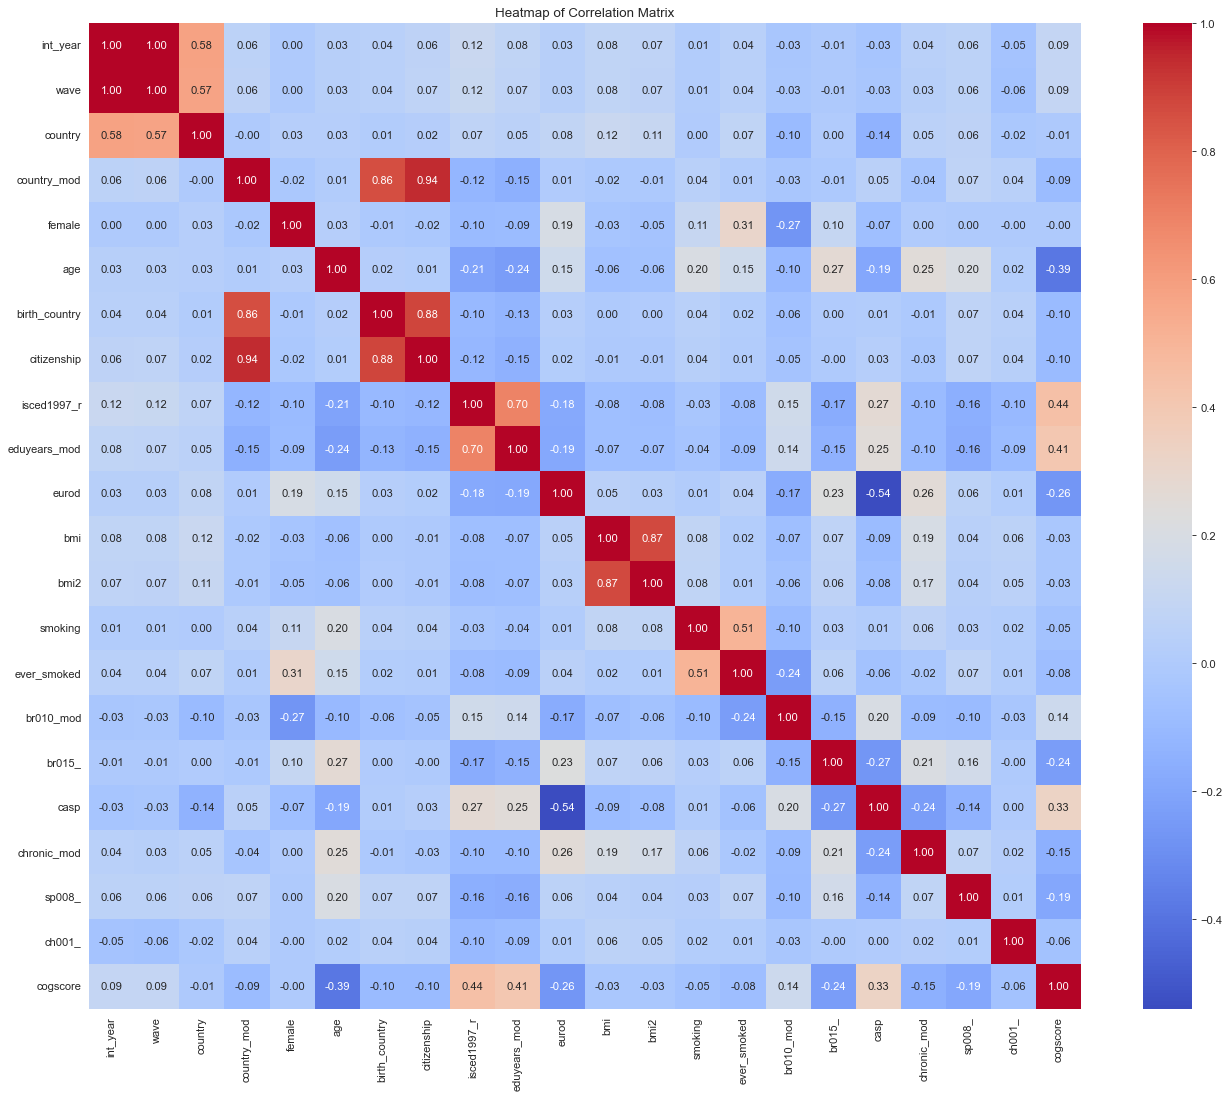

In [35]:
# Find the correlation matrix of the imputed DataFrame
corr = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

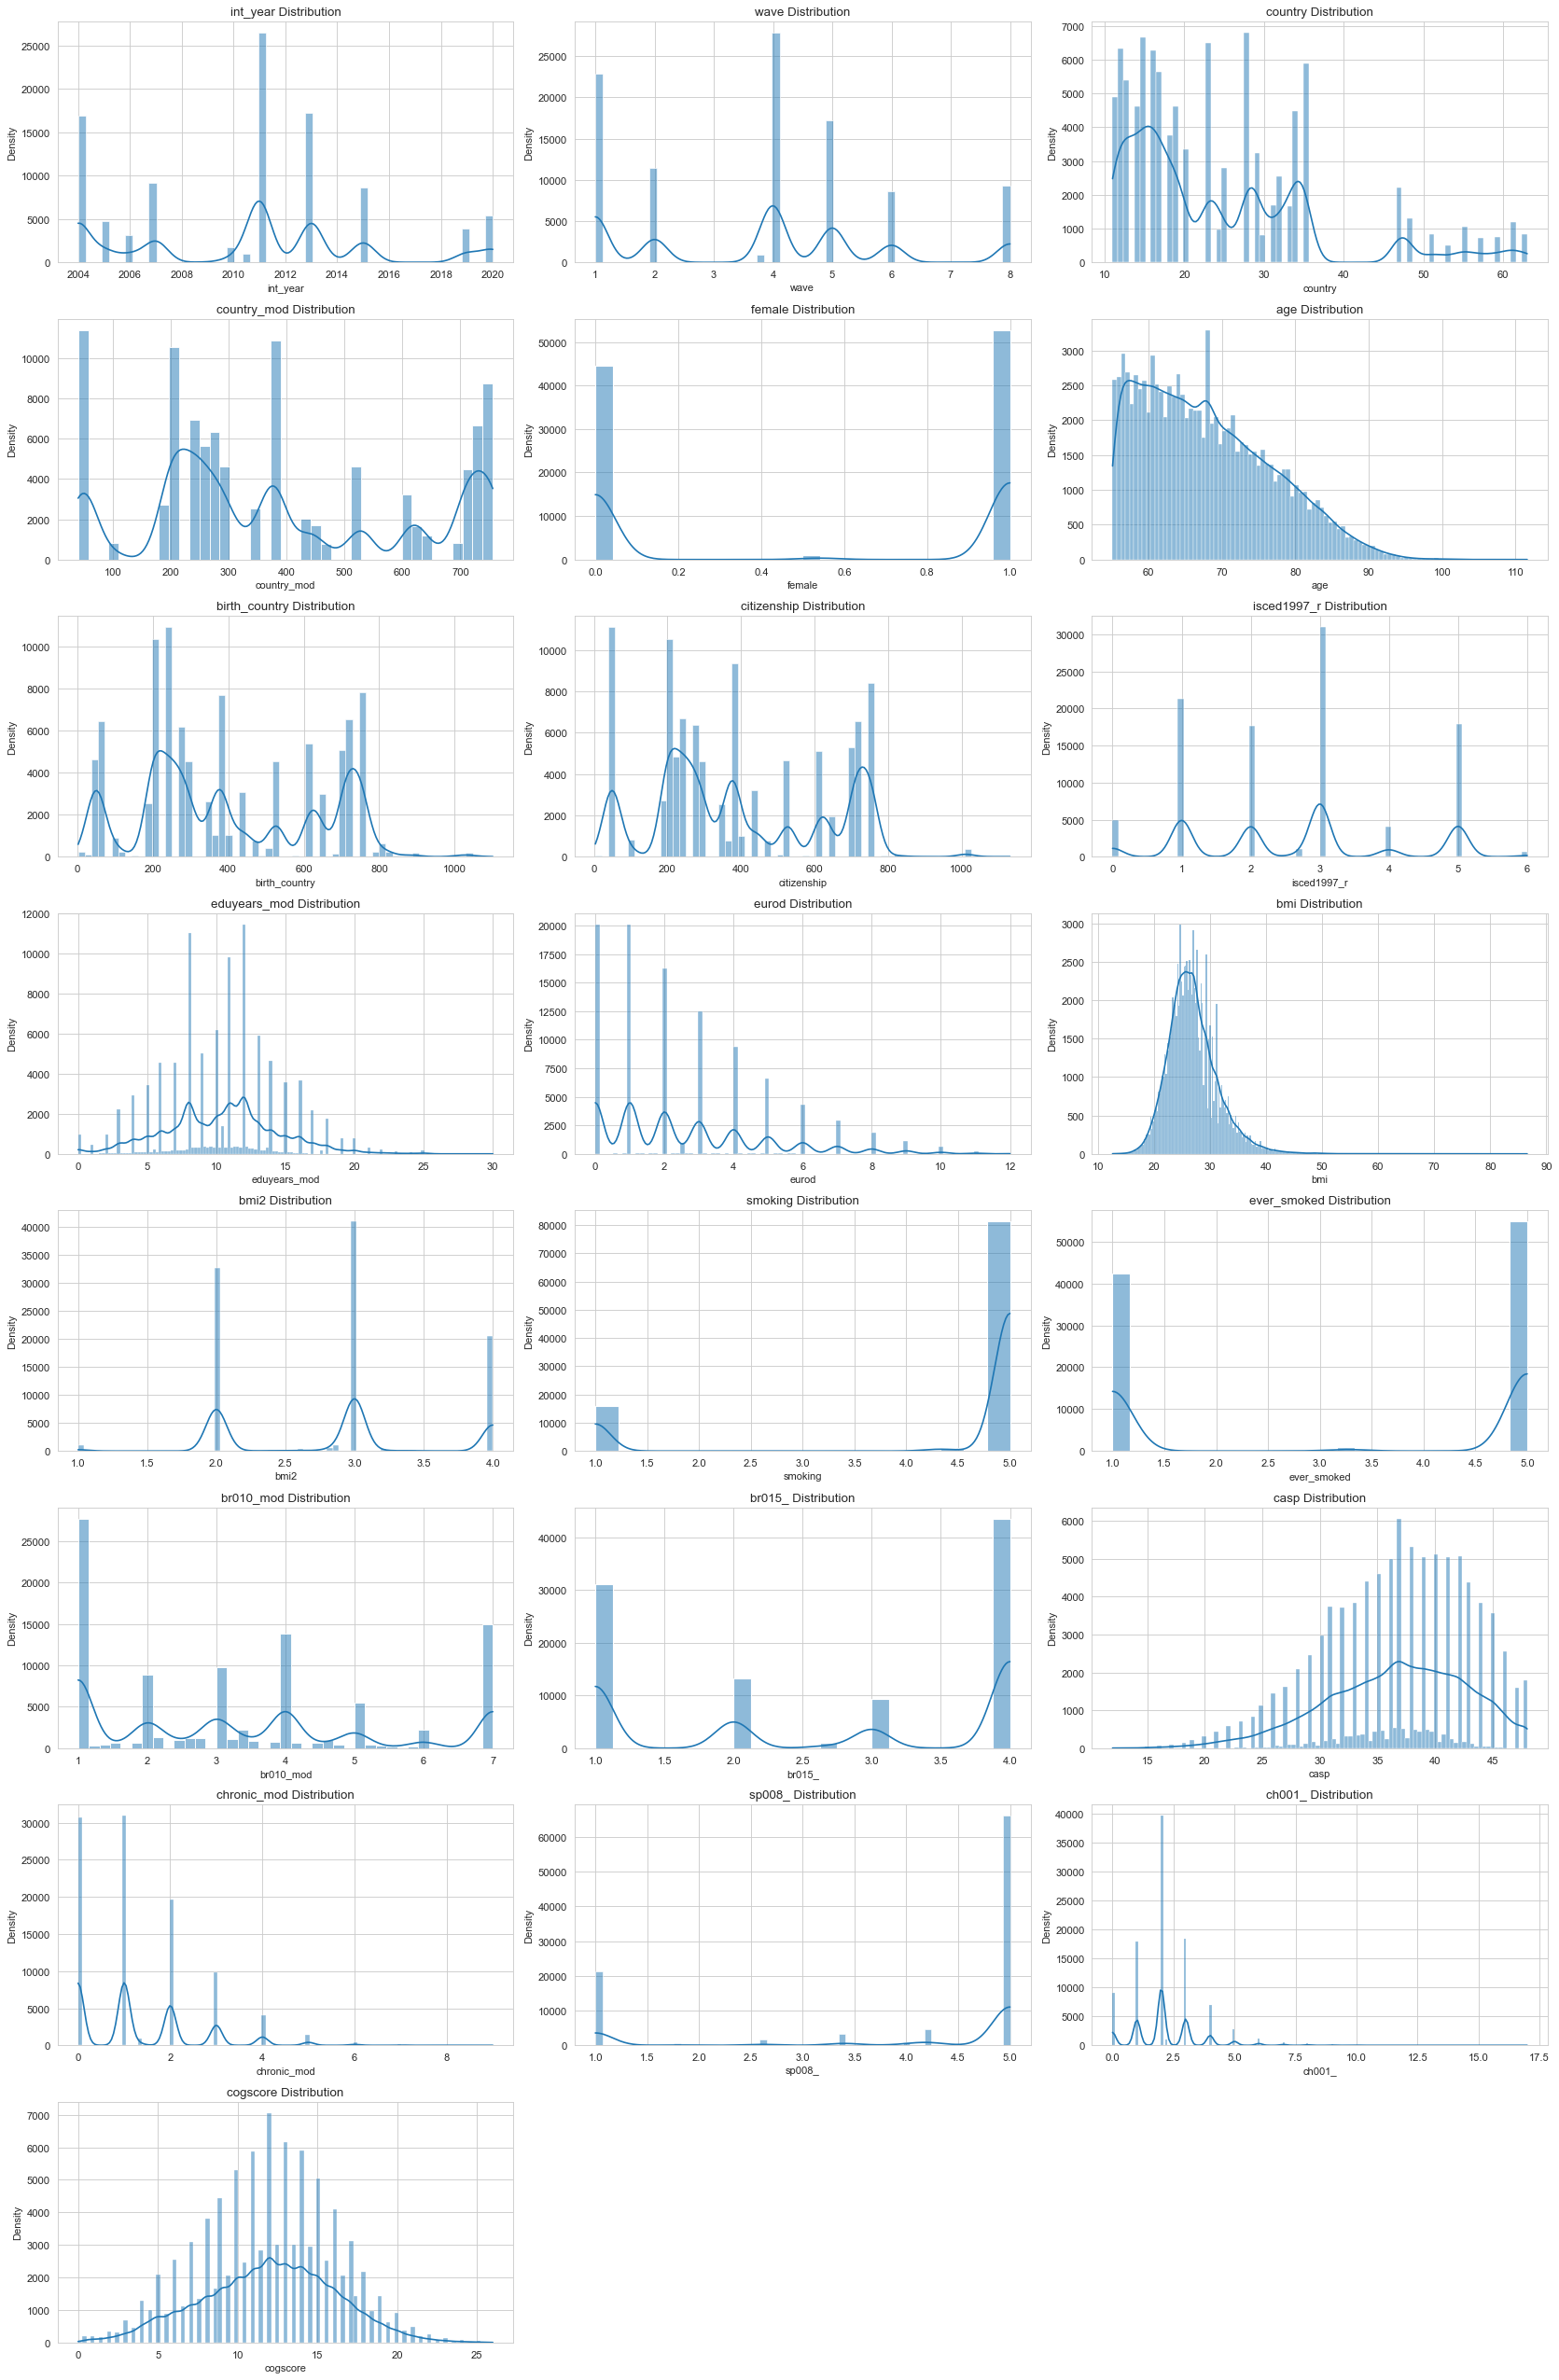

In [36]:
# Select numerical columns
num_cols = df.columns
num_plots = len(num_cols)
cols = 3  # Define the number of columns in your subplot grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate the required number of rows

# Plot the histograms of the numerical columns
plt.figure(figsize=(7 * cols, 4 * rows))  # Adjust the overall size of the subplot grid

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column].dropna(), kde=True)  # Using histplot instead of distplot
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Finding the Best Features for Predicting Cognitive Scores

To find the best features for predicting cognitive scores, you could use a variety of methods, such as:

1. **Correlation Analysis:** Identify which features are most strongly correlated with cognitive scores.
2. **Feature Importance:** Use machine learning models that provide feature importance scores, such as decision trees or ensemble methods like Random Forest.
3. **Univariate Selection:** Apply statistical tests to select those features that have a strong relationship with the cognitive scores.
4. **Wrapper Methods:** Utilize methods like Recursive Feature Elimination (RFE) which recursively remove the least important features.
5. **Principal Component Analysis (PCA):** Determine if a reduced set of components instead of the original features can effectively predict cognitive scores.
6. **Regularization Methods:** Use models with built-in regularization like LASSO or ElasticNet to penalize less important features.

#### Correlation Analysis
From the heatmap we can see that the variable `cogscore` shows varying degrees of correlation with several other factors. It seems to have a moderate positive correlation with `educyears_mod`, `isced1997_r` and `casp` show a positive correlation with `cogscore`. This suggests that: more years of education (`educyears_mod`) and higher educational attainment (`isced1997_r`) are associated with higher cognitive scores. This may reflect the cognitive reserve hypothesis, where education may contribute to the resilience of the brain to neuropathological damage. The `casp` variable, which often measures quality of life or well-being, is positively correlated with cognitive scores, possibly indicating that a higher quality of life is associated with better cognitive function. Conversely, 'cogscore' appears to have a moderate negative correlation with 'age', suggesting that older people tend to have lower cognitive scores. Weak correlations are observed with other variables such as `bmi`, `smoking` and `female`, suggesting that these factors may have less direct effect on cognitive scores. It's important to note that correlation does not imply causation and further analysis would be needed to draw more definitive conclusions.

#### Feature Importance

Random Forest is an ensemble machine learning algorithm that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct for decision trees' habit of overfitting to their training set. It's well-suited for a wide range of data problems and is robust against overfitting. The "random" part comes from the fact that it uses a random subset of features to split nodes in each decision tree, providing a diverse set of trees for the final prediction. The feature importance scores from a Random Forest model can be used to identify the most important features for predicting cognitive scores.

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'cogscore' is the target variable and it's a classification problem
X = df.drop('cogscore', axis=1)  # Features
y = df['cogscore']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the performance using an appropriate regression metric, such as Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame to find the most important features
feature_importance_df.sort_values('importance', ascending=False, inplace=True)
print(feature_importance_df.head())


Mean Squared Error: 10.739568517856004
         feature  importance
5            age    0.178334
8    isced1997_r    0.176734
11           bmi    0.094659
17          casp    0.089537
9   eduyears_mod    0.079889


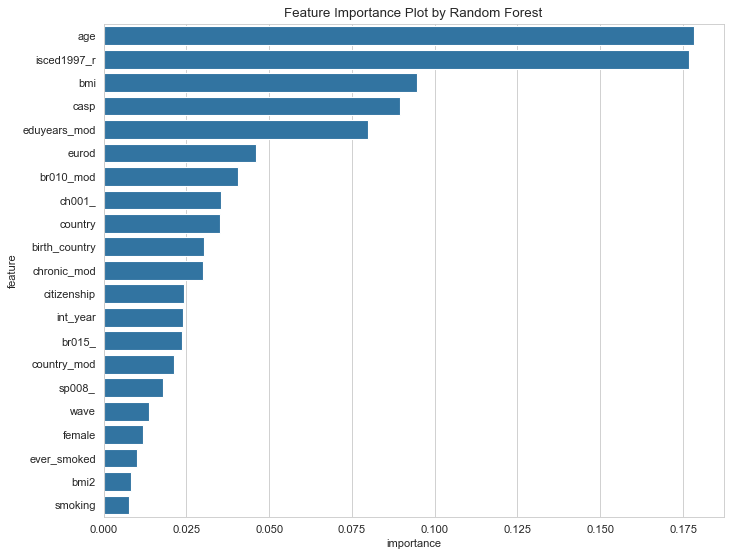

In [41]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance Plot by Random Forest')
plt.show()


In [7]:
# Assuming 'cogscore' is the target variable and it's a classification problem
X = df.drop('cogscore', axis=1) 
X_log = np.log(X + 1)
y = df['cogscore']  # Target

# Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_log.fit(X_train_log, y_train_log)

# Predict on the test data
y_pred_log = rf_log.predict(X_test_log)

# Calculate the performance using an appropriate regression metric, such as Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_log = mean_squared_error(y_test_log, y_pred_log)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = rf_log.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df_log = pd.DataFrame({'feature': X_log.columns, 'importance': importances})

# Sort the DataFrame to find the most important features
(feature_importance_df_log.sort_values('importance', ascending=False, inplace=True))
print(feature_importance_df.head())

Mean Squared Error: 10.74357355386507
         feature  importance
5            age    0.178315
8    isced1997_r    0.176754
11           bmi    0.094655
17          casp    0.089523
9   eduyears_mod    0.079879


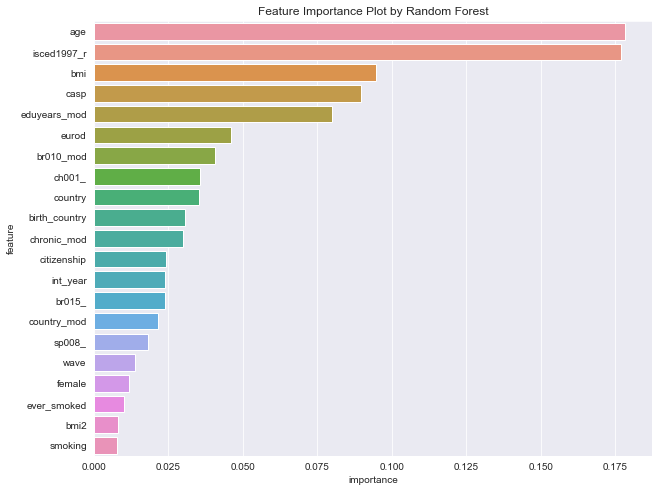

In [8]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df_log)
plt.title('Feature Importance Plot by Random Forest')
plt.show()

#### Univariate Selection

Univariate Selection in the context of feature selection refers to methods that evaluate each feature individually to determine the strength of the relationship of the feature with the response variable. These methods are simple to run and understand and are generally based on univariate statistical tests. For example, this can include techniques like chi-squared tests, ANOVA, or correlation coefficients, depending on whether the features are categorical or continuous. The key idea is to select those features that have the strongest relationship with the output variable. The selected features are often used as input to machine learning models. In the context of regression problems, the f_regression method from scikit-learn's feature_selection module can be used to select the best features based on univariate statistical tests.

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'cogscore' is the target variable
X = df.drop('cogscore', axis=1)  # Features
y = df['cogscore']  # Target

# Select top k features based on their relationship with the target variable
# f_regression is used here since we're dealing with a regression problem
selector = SelectKBest(score_func=f_regression, k='all')  # Use k='all' to select all features, or replace with desired number

# Fit to the data and transform it
X_new = selector.fit_transform(X, y)

# Get the scores of the features
scores = selector.scores_

# Create a DataFrame of features and their corresponding scores
features_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by their scores in descending order
features_scores_sorted = features_scores.sort_values(by='Score', ascending=False)

print(features_scores_sorted)

# Now you can use X_new with the selected features for further modeling


          Feature         Score
8     isced1997_r  23753.839534
9    eduyears_mod  19450.910524
5             age  17242.630013
17           casp  11758.838478
10          eurod   7417.114744
16         br015_   5870.747125
19         sp008_   3851.500293
18    chronic_mod   2413.795346
15      br010_mod   1912.123579
6   birth_country   1008.940460
7     citizenship    947.203329
1            wave    876.401345
0        int_year    850.617401
3     country_mod    817.088462
14    ever_smoked    644.679493
20         ch001_    314.551591
13        smoking    276.135282
11            bmi     76.097168
12           bmi2     75.821431
2         country      6.972047
4          female      0.064633


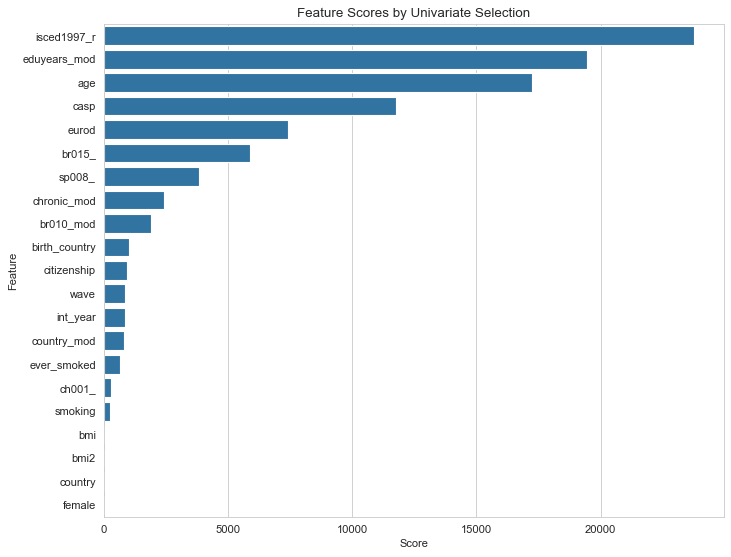

In [43]:
# Plot the feature scores
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=features_scores_sorted)
plt.title('Feature Scores by Univariate Selection')
plt.show()


#### Wrapper Methods

Wrapper methods are a type of feature selection that use a predictive model to score feature subsets and select the best-performing features according to model performance. Unlike filter methods, which use statistical techniques to evaluate the relationship between each feature and the target variable, wrapper methods assess subsets of features based on their usefulness to a given model.

Key characteristics of wrapper methods include:

1. **Search Strategy:** They involve a search through the space of possible feature subsets, which can be done exhaustively or through heuristic search strategies like forward selection, backward elimination, or recursive feature elimination.
2. **Model Feedback:** In each iteration, the method uses a model to assess the performance of feature subsets.
3. **Computationally Intensive:** Because they require fitting models on different subsets of features, wrapper methods can be computationally expensive, especially with large numbers of features.
4. **Model Specific:** The feature subsets selected are tailored to the predictive model used in the selection process.

Examples of wrapper methods include Recursive Feature Elimination (RFE), Sequential Feature Selector, and genetic algorithms for feature selection. These methods can be used with a variety of predictive models, such as linear regression, support vector machines, or decision trees.

In [44]:
from sklearn.feature_selection import RFE


# Assume 'cogscore' is the target variable
X = df.drop('cogscore', axis=1)  # Features
y = df['cogscore']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the random forest regressor
selector = RFE(rfr, n_features_to_select=5, step=1)

# Fit RFE
selector = selector.fit(X_train, y_train)

# Create a DataFrame to display feature importance
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': selector.ranking_})

# Sort the DataFrame based on the RFE ranking
feature_ranking_sorted = feature_ranking.sort_values('Importance', ascending=True)

print(feature_ranking_sorted.head())

# Now you can use the selected features for further modeling


          Feature  Importance
17           casp           1
11            bmi           1
5             age           1
6   birth_country           1
8     isced1997_r           1


In [45]:
print(feature_ranking_sorted.head(10))

          Feature  Importance
17           casp           1
11            bmi           1
5             age           1
6   birth_country           1
8     isced1997_r           1
9    eduyears_mod           2
15      br010_mod           3
10          eurod           4
2         country           5
20         ch001_           6


#### Principal Component Analysis (PCA)

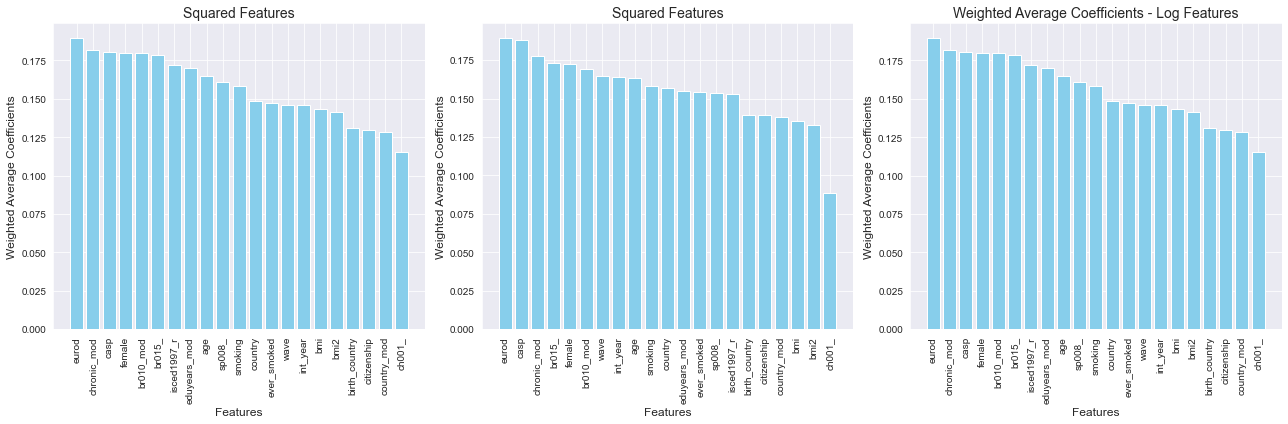

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 选择数值变量，排除非数值列和目标变量
X = df.drop(['cogscore'], axis=1)

# 标准化特征
X_scaled = StandardScaler().fit_transform(X)

# 应用PCA
pca = PCA()
pca.fit(X_scaled)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算绝对值系数
absolute_components = np.abs(pca.components_)

# 将绝对值系数乘以解释的方差比例
weighted_components = absolute_components.T @ explained_variance_ratio

# 计算每个特征的加权平均绝对值系数
#weighted_average_coefficients = np.mean(weighted_components, axis=1)

# 创建一个DataFrame来展示结果
features = X.columns
weighted_average_df = pd.DataFrame(weighted_components, index=features, columns=['Weighted Average Coefficients'])

weighted_average_df_sorted = weighted_average_df.sort_values(by='Weighted Average Coefficients', ascending=False)

# Calculate PCA for the log-transformed features
# Adding a small value before taking log to avoid log(0) which is undefined
X_log = np.log(X + 1)

# 标准化特征
X_scaled = StandardScaler().fit_transform(X_log)

# 应用PCA
pca = PCA()
pca.fit(X_scaled)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算绝对值系数
absolute_components = np.abs(pca.components_)

# 将绝对值系数乘以解释的方差比例
weighted_components = absolute_components.T @ explained_variance_ratio

# 计算每个特征的加权平均绝对值系数
#weighted_average_coefficients = np.mean(weighted_components, axis=1)

# 创建一个DataFrame来展示结果
features = X.columns
weighted_log_df = pd.DataFrame(weighted_components, index=features, columns=['Weighted Average Coefficients'])

weighted_log_df_sorted = weighted_log_df.sort_values(by='Weighted Average Coefficients', ascending=False)

# For calculating PCA on the square of each variable, first square the features
X_squared = X ** 2

# 标准化特征
X_scaled = StandardScaler().fit_transform(X_squared)

# 应用PCA
pca = PCA()
pca.fit(X_scaled)

# 获取每个主成分解释的方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算绝对值系数
absolute_components = np.abs(pca.components_)

# 将绝对值系数乘以解释的方差比例
weighted_components = absolute_components.T @ explained_variance_ratio

# 创建一个DataFrame来展示结果
features = X.columns
weighted_squared_df = pd.DataFrame(weighted_components, index=features, columns=['Weighted Average Coefficients'])

weighted_squared_df_sorted = weighted_squared_df.sort_values(by='Weighted Average Coefficients', ascending=False)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original Features PCA
axs[0].bar(weighted_average_df_sorted.index, weighted_average_df_sorted['Weighted Average Coefficients'],
           color='skyblue')
axs[0].set_title('Squared Features', fontsize=14)
axs[0].set_xlabel('Features', fontsize=12)
axs[0].set_ylabel('Weighted Average Coefficients', fontsize=12)
axs[0].tick_params(axis='x', rotation=90)

# Squared Features PCA
axs[1].bar(weighted_squared_df_sorted.index, weighted_squared_df_sorted['Weighted Average Coefficients'],
           color='skyblue')
axs[1].set_title('Squared Features', fontsize=14)
axs[1].set_xlabel('Features', fontsize=12)
axs[1].set_ylabel('Weighted Average Coefficients', fontsize=12)
axs[1].tick_params(axis='x', rotation=90)

# Weighted Average Coefficients for Log-transformed Features
axs[2].bar(weighted_average_df_sorted.index, weighted_average_df_sorted['Weighted Average Coefficients'],
           color='skyblue')
axs[2].set_title('Weighted Average Coefficients - Log Features', fontsize=14)
axs[2].set_xlabel('Features', fontsize=12)
axs[2].set_ylabel('Weighted Average Coefficients', fontsize=12)
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

X = df.drop('cogscore', axis=1)  # 删除列 'cogscore'

# 目标变量
y = df['cogscore']

# 添加常数项，以便我们模型中有截距
X = sm.add_constant(X)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 获取模型的残差
residuals = model.resid

# 残差的独立性
# Durbin-Watson 测试
from statsmodels.stats.stattools import durbin_watson
dw_test_stat = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test_stat}')

# 残差的常数方差性（同方差性）
# 残差 vs. 预测值散点图
plt.scatter(model.predict(), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# 残差的正态性
# Q-Q 图
fig = sm.qqplot(residuals, stats.norm, fit=True, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk 测试
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')


ImportError: cannot import name 'PD_LT_2' from 'statsmodels.compat.pandas' (/Users/iris/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py)

In [12]:
import statsmodels.api as sm

# 假设 X 和 y 已经定义并且 X 已经包含了截距项
# X = sm.add_constant(X)  # 如果X还没有截距项，取消注释这行代码

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 使用异方差性稳健的标准误差来重新拟合模型
robust_model = model.get_robustcov_results(cov_type='HC1')

# 输出带有异方差性稳健标准误差的模型摘要
print(robust_model.summary())

ImportError: cannot import name 'PD_LT_2' from 'statsmodels.compat.pandas' (/Users/iris/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py)

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

In [8]:
# 首先，我们需要加载数据，并且只选择指定的特征和目标变量进行分析。
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# 选择特定的特征
selected_features = ['age', 'br010_mod', 'br015_', 'casp', 'chronic_mod', 'eduyears_mod', 'eurod', 'isced1997_r', 'sp008_']

X = df[selected_features]

# 目标变量
y = df['cogscore']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义alpha值的范围
alpha_range = np.logspace(-4, -0.5, 30)

# 创建Lasso模型
lasso = Lasso()

# 创建GridSearchCV对象
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 获取最佳alpha值
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# 使用最佳alpha值训练Lasso模型
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# 预测测试集
y_pred = lasso_best.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Best alpha:", mse)

# 打印最佳模型的系数
print("Coefficients with Best alpha:", lasso_best.coef_)


Best alpha: 0.0001
Mean Squared Error with Best alpha: 11.413423733994222
Coefficients with Best alpha: [-1.0160155   0.03347178 -0.21779352  0.49686579  0.02944429  0.48096716
 -0.35053815  1.00107648 -0.24067216]


In [9]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.34944408774609326


In [13]:
# 应用对数变换
df['log_age'] = np.log(df['age'] + 1)
df['log_bmi'] = np.log(df['bmi'] + 1)
df['log_ch001_'] = np.log(df['ch001_'] + 1)
df['log_chronic_mod'] = np.log(df['chronic_mod'] + 1)
df['log_eurod'] = np.log(df['eurod'] + 1)
df['log_casp'] = np.log(df['casp'] + 1)

# 现在 df 包含了原始列和对数变换后的列
df[['log_age', 'log_bmi', 'log_ch001_', 'log_chronic_mod', 'log_eurod', 'log_casp']].head()

log_age   log_bmi  log_ch001_  log_chronic_mod  log_eurod  log_casp
0  4.105944  3.219828    1.098612         0.693147   0.693147  3.806662
1  4.298645  3.403393    0.000000         1.945910   1.386294  3.583519
2  4.104295  3.109549    1.945910         0.693147   1.098612  3.784190
3  4.107590  3.186283    1.945910         0.693147   0.693147  3.871201
4  4.131961  3.207726    1.098612         0.000000   1.098612  3.784190

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# 假设 df 是你的 DataFrame，并且它包含了所有的特征和目标变量
# 我们将使用 'log_' 开头的特征进行模型训练

# 提取特征和目标变量
X_log = df.filter(regex='^log_')
y = df['cogscore']


# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义alpha值的范围
alpha_range = np.linspace(-4, 100, 100)

# 创建Lasso模型
ridge = Ridge()

# 创建GridSearchCV对象
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 获取最佳alpha值
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# 使用最佳alpha值训练Lasso模型
lasso_best = (Ridge
              
              
              (alpha=best_alpha))
lasso_best.fit(X_train, y_train)

# 预测测试集
y_pred = lasso_best.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Best alpha:", mse)

# 打印最佳模型的系数
print("Coefficients with Best alpha:", lasso_best.coef_)


Best alpha: 49.57575757575758
Mean Squared Error with Best alpha: 13.477083117629533
Coefficients with Best alpha: [-1.36094565 -0.09636209 -0.12430187  0.03017747 -0.39795473  0.89573793]


/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 1123, in fit
    self._validate_params()
  File "/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
 

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.23181717366740462


# References

*Include references if any*

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1.ipynb